In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import matplotlib.image as img
from scipy.signal import convolve2d
from scipy.ndimage import gaussian_filter
from astropy.convolution import Gaussian2DKernel

In [2]:
def filter_g(data,sigma):
    length=len(data)
    filter_r=np.arange(-length/40,length/40,1/20)
    Gauss_m=np.zeros(length)
    j=0
    for i in (filter_r):
        Gauss_m[j]=(1/(np.sqrt(2*np.pi*sigma**2)))*np.exp((-i**2)/(2*sigma**2))
        j+=1
    return Gauss_m                  

Text(0, 0.5, 'Amplitude')

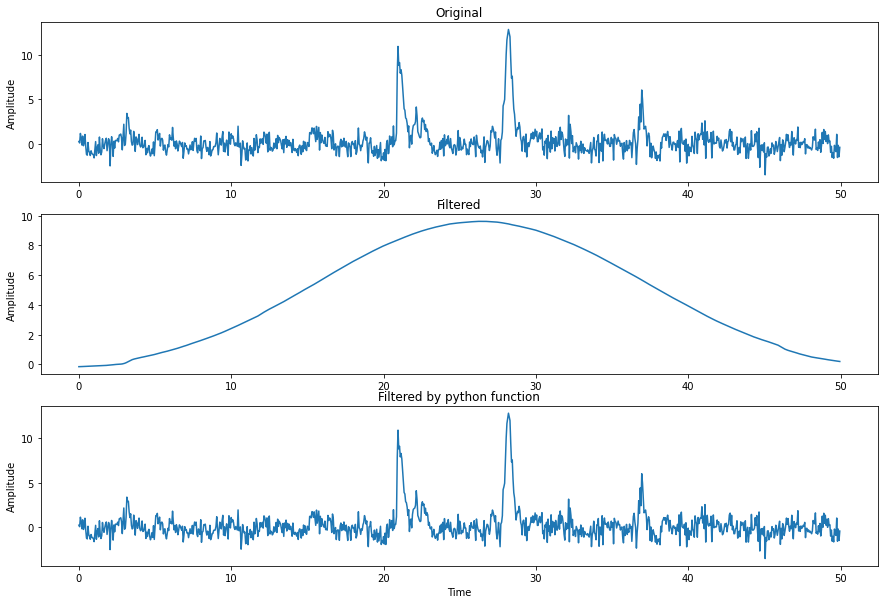

In [204]:
data=np.load('A:\\Documents\\Neuroscience Master\\Second semester\\The Neural Code Quantitative Analysis of Neural Activity\\sheet3\\exampleCAtrace.npy')
fs=20
snippet=data[1000:2000]
sigma=0.250
t=np.arange(0,len(snippet)/20,1/20)
# My filter
Gauss_m=filter_g(snippet,sigma)
y_gauss=np.convolve(snippet,Gauss_m,mode='same')
# python function
y2=gaussian_filter1d(snippet,sigma)

#Plots
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(t,snippet)
plt.title('Original')
plt.ylabel('Amplitude')

plt.subplot(3,1,2)
plt.plot(t,y)
plt.title('Filtered')
plt.ylabel('Amplitude')

plt.subplot(3,1,3)
plt.plot(t,y2)
plt.title('Filtered by python function')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Differents sigmas

Text(0.5, 0, 'Time (s)')

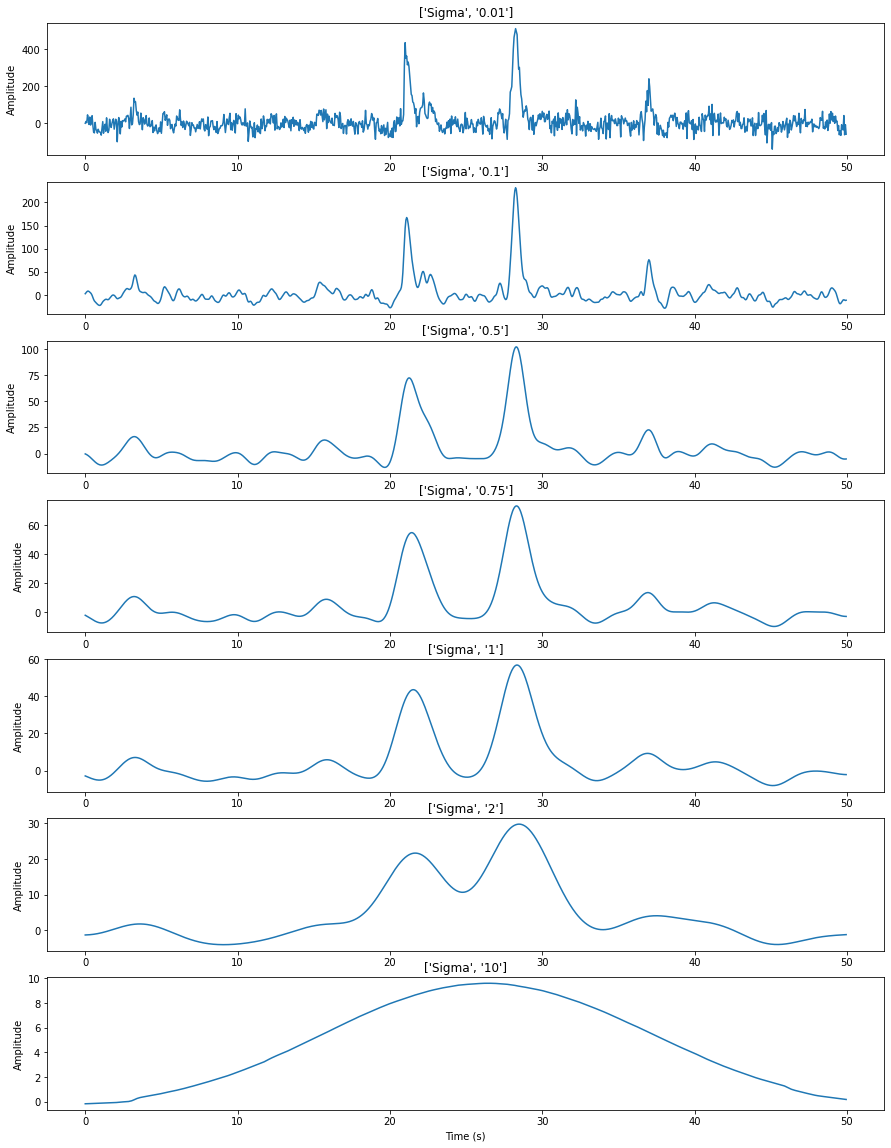

In [195]:
sigma=[0.01, 0.1, 0.5, 0.75, 1, 2, 10]
plt.figure(figsize=(15,20))
j=1
for i in sigma:
    Gauss_m=filter_g(snippet,i)
    y=np.convolve(snippet,Gauss_m,mode='same')
    plt.subplot(len(sigma),1,j)
    plt.plot(t,y)
    plt.title(['Sigma', str(i)])
    plt.ylabel('Amplitude')
    j+=1
    
plt.xlabel('Time (s)')

# e)

In [196]:
def filter2_g(data,sigma):
    length=len(data)
    filter_r=np.arange(-length/40,length/40,1/20)
    Gauss_m=np.zeros(length)
    j=0
    for i in (filter_r):
        Gauss_m[j]=(1/(np.sqrt(2*np.pi*sigma**2)))*np.exp((-i**2)/(2*sigma**2))*(-np.sin(2*np.pi*i))
        j+=1
    return Gauss_m                  

Text(0.5, 0, 'Time (s)')

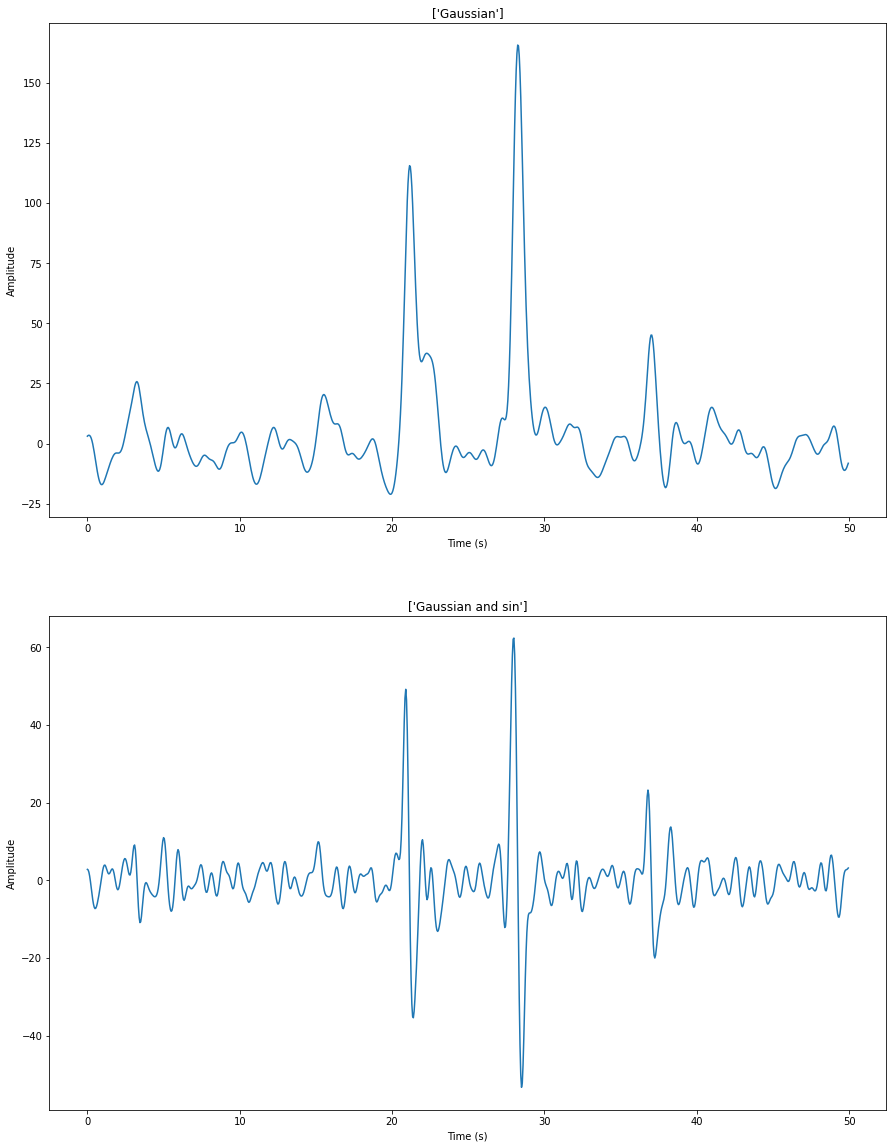

In [197]:
sigma=0.250
plt.figure(figsize=(15,20))
j=1
Gauss_m=filter2_g(snippet,sigma)
y_sin=np.convolve(snippet,Gauss_m,mode='same')
plt.subplot(2,1,1)
plt.plot(t,y_gauss)
plt.title(['Gaussian'])
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')

plt.subplot(2,1,2)
plt.plot(t,y_sin)
plt.title(['Gaussian and sin'])
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')

In [198]:
def filter3_g(data,sigma):
    length=len(data)
    filter_r=np.arange(-length/40,length/40,1/20)
    Gauss_m=np.zeros(length)
    j=0
    for i in (filter_r):
        Gauss_m[j]=(1/(np.sqrt(2*np.pi*sigma**2)))*((i**2-sigma**2)/(sigma**4))*np.exp((-i**2)/(2*sigma**2))
        j+=1
    return Gauss_m  

Text(0.5, 0, 'Time (s)')

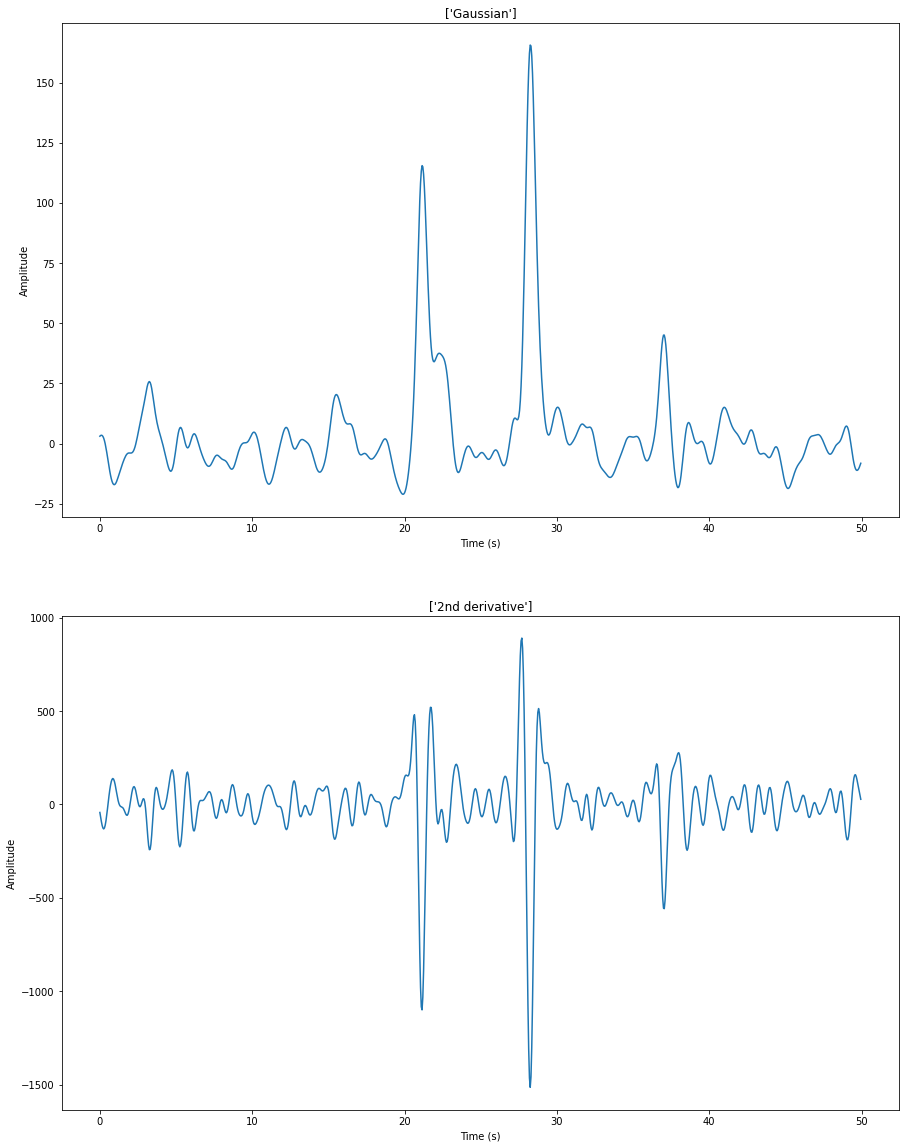

In [199]:
sigma=0.250
plt.figure(figsize=(15,20))
j=1
Gauss_m=filter3_g(snippet,sigma)
y_2der=np.convolve(snippet,Gauss_m,mode='same')
plt.subplot(2,1,1)
plt.plot(t,y_gauss)
plt.title(['Gaussian'])
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')

plt.subplot(2,1,2)
plt.plot(t,y_2der)
plt.title(['2nd derivative'])
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')

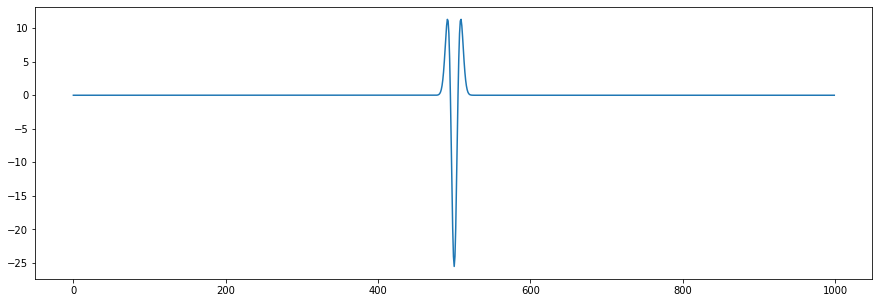

In [202]:
plt.figure(figsize=(15,5))
plt.plot(Gauss_m)

# Image filters

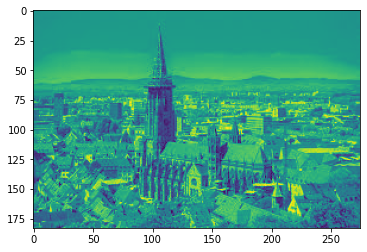

In [5]:
#Loading and plotting data
img_m=img.imread('A:\\Documents\\Neuroscience Master\\Second semester\\The Neural Code Quantitative Analysis of Neural Activity\\sheet3\\freiburg.jpeg')
img_2=np.mean(np.array(img_m),axis=2)
plt.imshow(img_2)
#plt.imshow(img_2,cmap='gray')


In [6]:
def gauss_k(sigma=1):
    sigma=sigma
    m=(sigma)*9-(sigma-1)
    n=(sigma)*9-(sigma-1)
    st=(sigma)*9-(sigma-1)
    
    #Creation of meshgrid
    x,y=np.meshgrid(np.linspace(-(m)/2,(m)/2,st), np.linspace(-(n)/2,(n)/2,st))
    dst=x*x+y*y
    #Computing the kernel with the gaussian formula
    gauss = np.exp(-dst/(2*sigma**2))/(2*np.pi*sigma**2)
    return gauss

In [7]:
sigma=5
#Computing the kernel
gauss=gauss_k(sigma)
#convolving the kernel with the image.
y_img=convolve2d(img_2,gauss,mode='same')

#Python's functions
gaussian_2D_kernel = Gaussian2DKernel(sigma)
y_img_p=gaussian_filter(img_2,sigma=sigma)

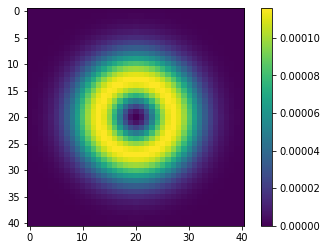

In [9]:
#looking for the differences between my kernel and python's
dif_k=gaussian_2D_kernel.array-gauss
plt.imshow(dif_k)
plt.colorbar()

Text(0.5, 1.0, 'Python filter')

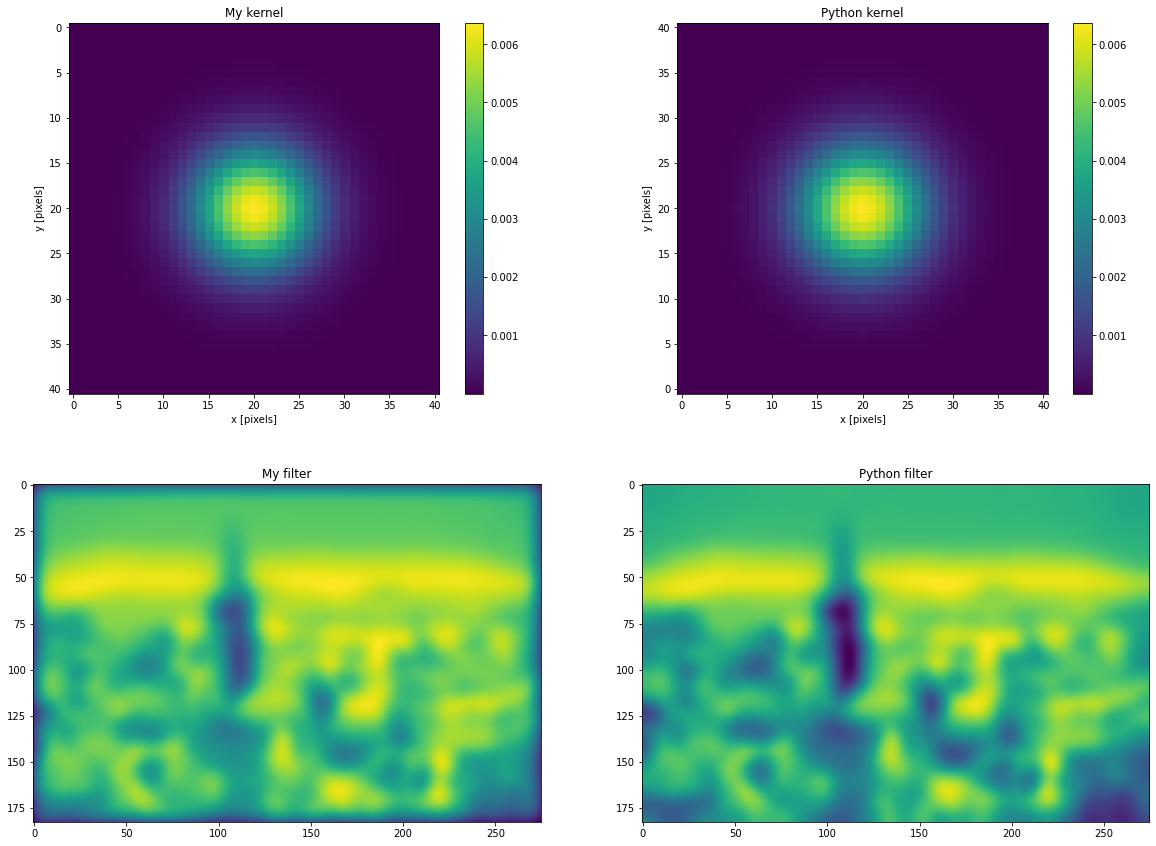

In [8]:
#Plotting the kernel and the image filtered computed with python functions and mine --> just to compare

plt.figure(figsize=(20,15))

#Plotting my kernel
plt.subplot(2,2,1)
plt.imshow(gauss)
plt.xlabel('x [pixels]')
plt.ylabel('y [pixels]')
plt.title('My kernel')
plt.colorbar()

#Plotting my image filtered
plt.subplot(2,2,3)
plt.imshow(y_img)
plt.title('My filter')

#Plotting pythons kernel
plt.subplot(2,2,2)
plt.imshow(gaussian_2D_kernel, interpolation='none', origin='lower')
plt.xlabel('x [pixels]')
plt.ylabel('y [pixels]')
plt.title('Python kernel')
plt.colorbar()

#Plotting image filtered with python
plt.subplot(2,2,4)
plt.imshow(y_img_p)
plt.title('Python filter')

In [8]:
%matplotlib inline

In [11]:
def gabor_k(sigma,phi,k):
    #Defining variables
    m=(sigma)*9-(sigma-1)
    n=(sigma)*9-(sigma-1)
    st=(sigma)*9-(sigma-1)
    #Creating meshgrid
    x,y=np.meshgrid(np.linspace(-(m)/2,(m)/2,st), np.linspace(-(n)/2,(n)/2,st))
    # x and y * k
    x_theta = x * k[0] + y * k[1]
    # x vector**2
    std=x**2+y**2
    # Computing the kernel
    kernel = np.exp(-std/(2*sigma**2))*np.cos(x_theta-phi)
    return kernel

Text(0.02, 0.5, '$\\phi$ [0-$\\pi$]')

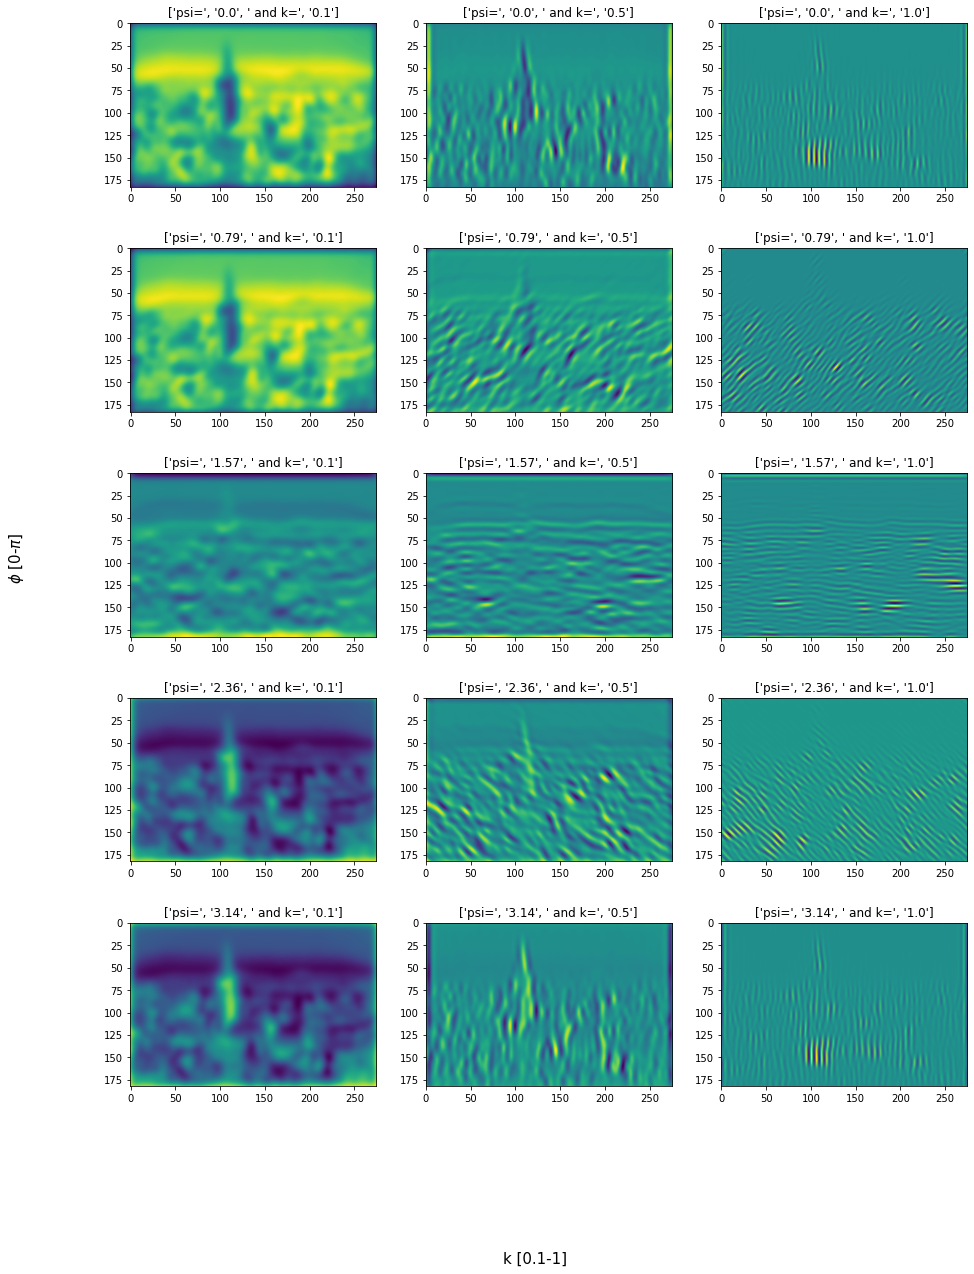

In [12]:
#angles for the cosine and psi
angle=np.meshgrid([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi],[0,1,2])[0]
angle=np.reshape(angle.T,15)
sigma=5
#L of k
n=[0.1,0.5,1,0.1,0.5,1,0.1,0.5,1,0.1,0.5,1,0.1,0.5,1]

fig = plt.figure(figsize=(15,20),)

for p,phi in enumerate(angle):
    #Defining k
    k=np.array([np.cos(angle[p]),np.sin(angle[p])])*n[p] 
    #Computing the kernel
    kernel=gabor_k(sigma,phi,k)
    #Convolution of kernel and image
    y_img_g=convolve2d(img_2,kernel,mode='same')
    
    #Plotting new image
    fig.add_subplot(5,3,p+1)
    plt.imshow(y_img_g)
    plt.title(['phi=',str(round(phi,2)),' and k=',str(round(np.abs(complex(k[0],k[1])),2))])

fig.supxlabel('k [0.1-1]',ha='center',va='baseline',size=15)
fig.supylabel('$\phi$ [0-$\pi$]',ha='center',va='center',size=15) 


Text(0.02, 0.5, '$\\phi$ [0-$\\pi$]')

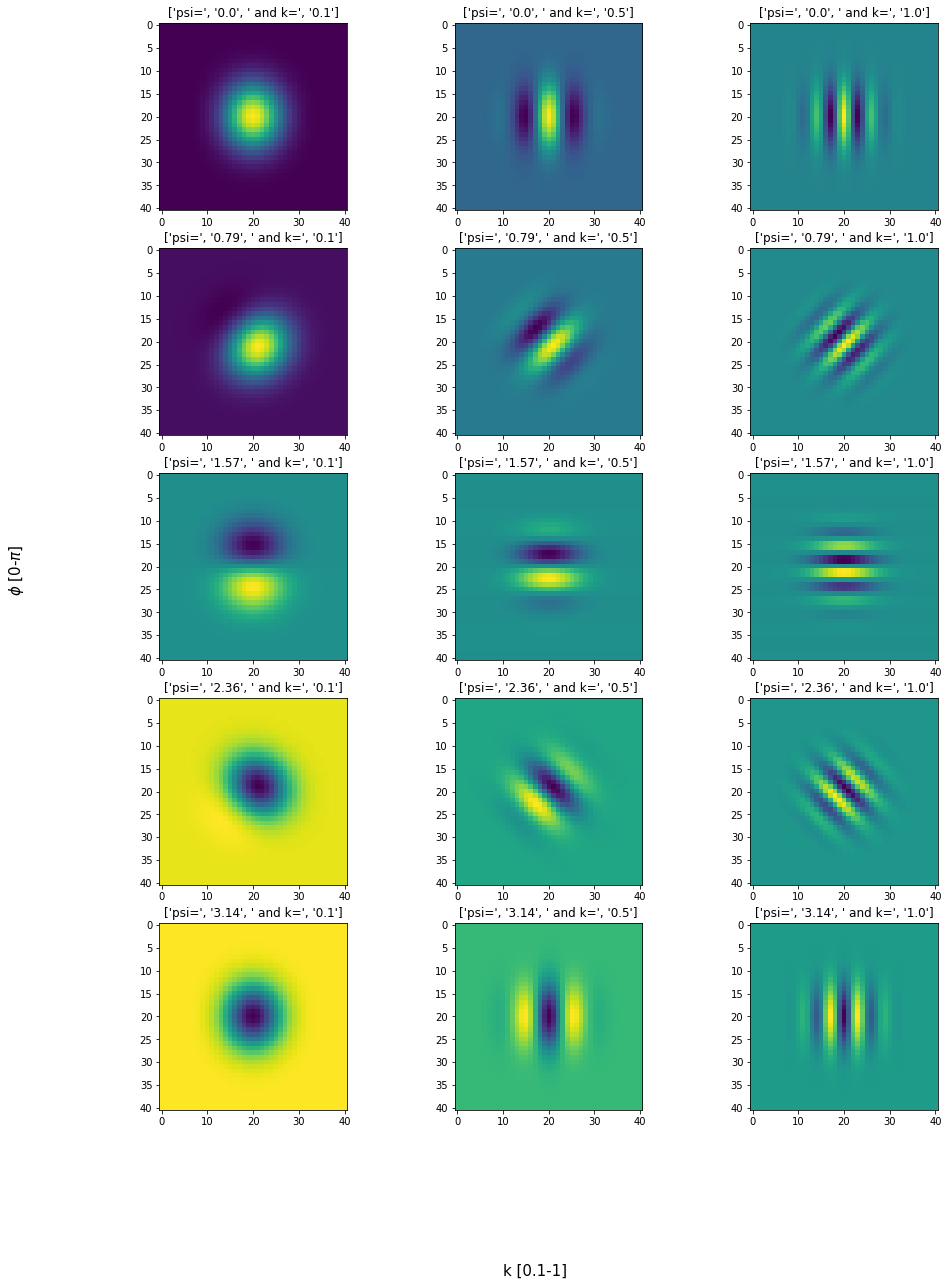

In [11]:
fig = plt.figure(figsize=(15,20),)

for p,phi in enumerate(angle):
    #Defining k
    k=np.array([np.cos(angle[p]),np.sin(angle[p])])*n[p] 
    #Computing the kernel
    kernel=gabor_k(sigma,phi,k)

    #Plotting kernel
    fig.add_subplot(5,3,p+1)
    plt.imshow(kernel)
    plt.title(['psi=',str(round(phi,2)),' and k=',str(round(np.abs(complex(k[0],k[1])),2))])

fig.supxlabel('k [0.1-1]',ha='center',va='baseline',size=15)
fig.supylabel('$\phi$ [0-$\pi$]',ha='center',va='center',size=15) 


Text(0.02, 0.5, '$\\phi$ [$\\pi/4$]')

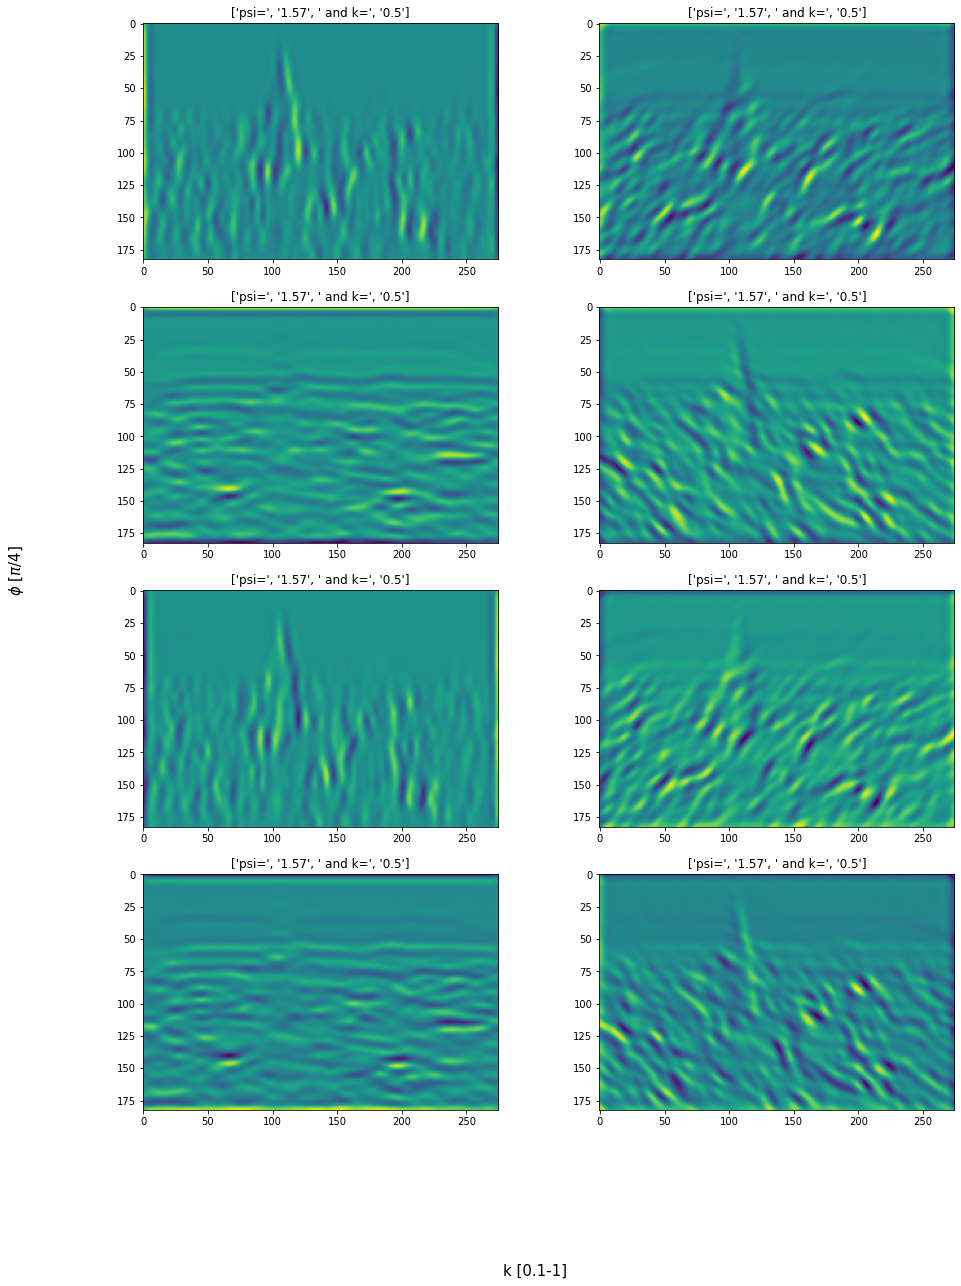

In [13]:
#angles for the constructing different vectors k
angle=np.arange(-np.pi,np.pi, np.pi/4)
#angle phi for edge detector
phi=np.pi/2
sigma=5
#L of k
n=0.5

fig = plt.figure(figsize=(15,20),)
j=0
for p in angle:
    #Defining k
    k=np.array([np.cos(p),np.sin(p)])*n 
    #Computing the kernel
    kernel=gabor_k(sigma,phi,k)
    #Convolution of kernel and image
    y_img_g=convolve2d(img_2,kernel,mode='same')
    j+=1
    #Plotting new image
    fig.add_subplot(4,2,j)
    plt.imshow(y_img_g)
    plt.title(['psi=',str(round(phi,2)),' and k=',str(round(np.abs(complex(k[0],k[1])),2))])

fig.supxlabel('k [0.1-1]',ha='center',va='baseline',size=15)
fig.supylabel('$\phi$ [$\pi/4$]',ha='center',va='center',size=15) 

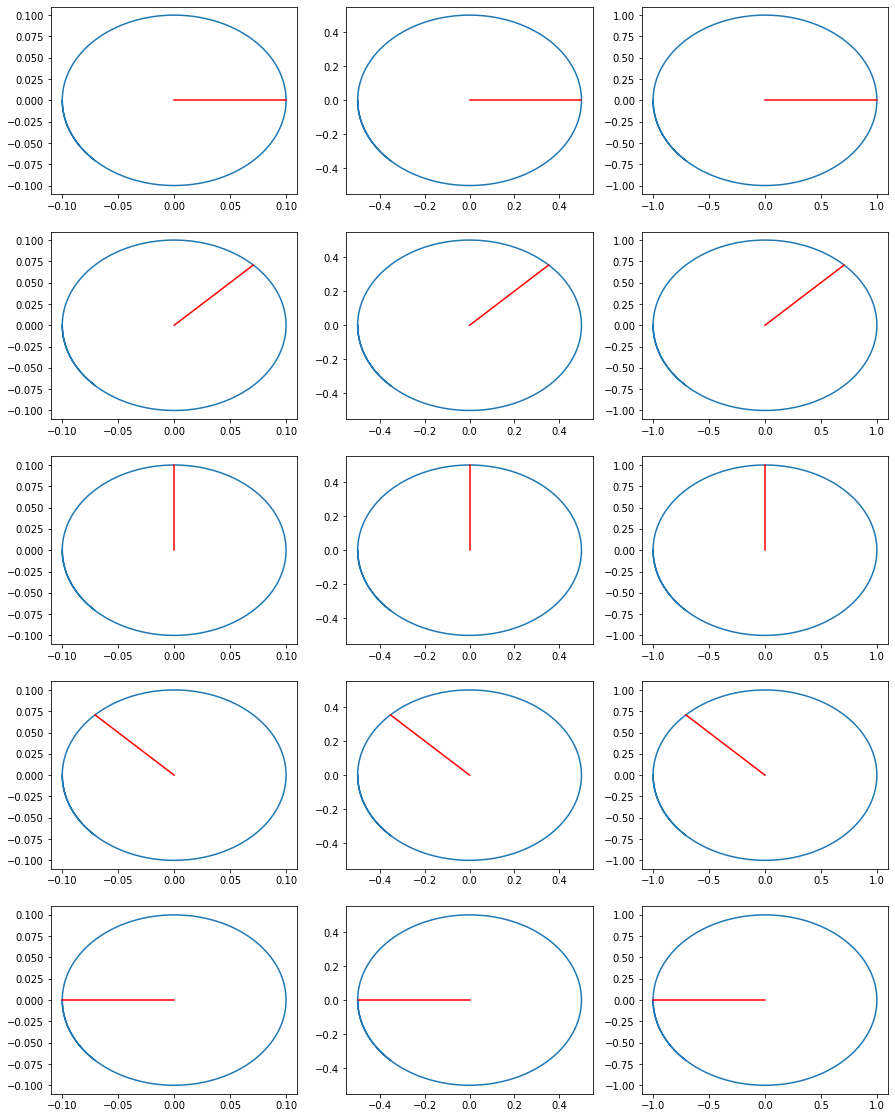

In [42]:
angle=np.arange(-np.pi,np.pi+np.pi/4, 0.001)
n=[0.1,0.5,1,0.1,0.5,1,0.1,0.5,1,0.1,0.5,1,0.1,0.5,1]
angle2=np.meshgrid([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi],[0,1,2])[0]
angle2=np.reshape(angle2.T,15)
fig = plt.figure(figsize=(15,20),)
for p,theta in enumerate(angle2):
    #Creating the circle
    circle=np.zeros((len(angle),2))
    circle[:,0]=np.cos(angle)*n[p]
    circle[:,1]=np.sin(angle)*n[p]
    #defining the angle k
    k=np.zeros((2,2))
    k[1,0]=np.cos(theta)*n[p]
    k[1,1]=np.sin(theta)*n[p]
    
    #Plotting the circle and k
    fig.add_subplot(5,3,p+1)
    plt.plot(circle[:,0],circle[:,1])
    plt.plot(k[:,0],k[:,1],'-r')
    

#fig.supxlabel('k [0.1-1]',ha='center',va='baseline',size=15)
#fig.supylabel('$\phi$ [0-$\pi$]',ha='center',va='center',size=15) )